In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Data/201801_citibikenyc_tripdata.csv")
data.head()
data_backup = data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718990 entries, 0 to 718989
Data columns (total 16 columns):
tripduration               718990 non-null int64
starttime                  718990 non-null object
stoptime                   718990 non-null object
start station id           718990 non-null int64
start station name         718990 non-null object
start station latitude     718990 non-null float64
start station longitude    718990 non-null float64
end station id             718990 non-null int64
end station name           718990 non-null object
end station latitude       718990 non-null float64
end station longitude      718990 non-null float64
bikeid                     718990 non-null int64
name_localizedValue0       718990 non-null object
usertype                   718990 non-null object
birth year                 692847 non-null float64
gender                     718990 non-null int64
dtypes: float64(5), int64(5), object(6)
memory usage: 87.8+ MB


In [4]:
data.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,7.189900e+05,718990.000000,718990.000000,718990.000000,718990.000000,718990.000000,718990.000000,718990.000000,692847.000000,718990.000000
mean,7.566194e+02,1469.512583,40.737894,-73.982934,1460.942601,40.737620,-73.983203,26078.064018,1978.096792,1.169973
std,9.573695e+03,1398.624562,0.044702,0.018219,1396.756964,0.044525,0.018273,6311.929991,12.118001,0.472665
min,6.100000e+01,72.000000,40.646538,-74.017134,72.000000,40.646538,-74.033552,14529.000000,1885.000000,0.000000
25%,3.190000e+02,377.000000,40.719079,-73.994685,376.000000,40.719105,-73.994758,19558.000000,1969.000000,1.000000
50%,5.100000e+02,497.000000,40.739355,-73.985649,497.000000,40.739323,-73.986580,28538.000000,1981.000000,1.000000
75%,8.420000e+02,3170.000000,40.756687,-73.974987,3169.000000,40.756405,-73.975232,31571.000000,1988.000000,1.000000
max,4.421929e+06,3664.000000,45.506364,-73.568906,3664.000000,45.506364,-73.568906,33522.000000,2002.000000,2.000000


Shape of the data.

In [5]:
data.shape

(718990, 16)

To check the presence of null values.

In [6]:
data.isnull().sum()  

tripduration                   0
starttime                      0
stoptime                       0
start station id               0
start station name             0
start station latitude         0
start station longitude        0
end station id                 0
end station name               0
end station latitude           0
end station longitude          0
bikeid                         0
name_localizedValue0           0
usertype                       0
birth year                 26143
gender                         0
dtype: int64

In [7]:
data['age']=2018-data['birth year']

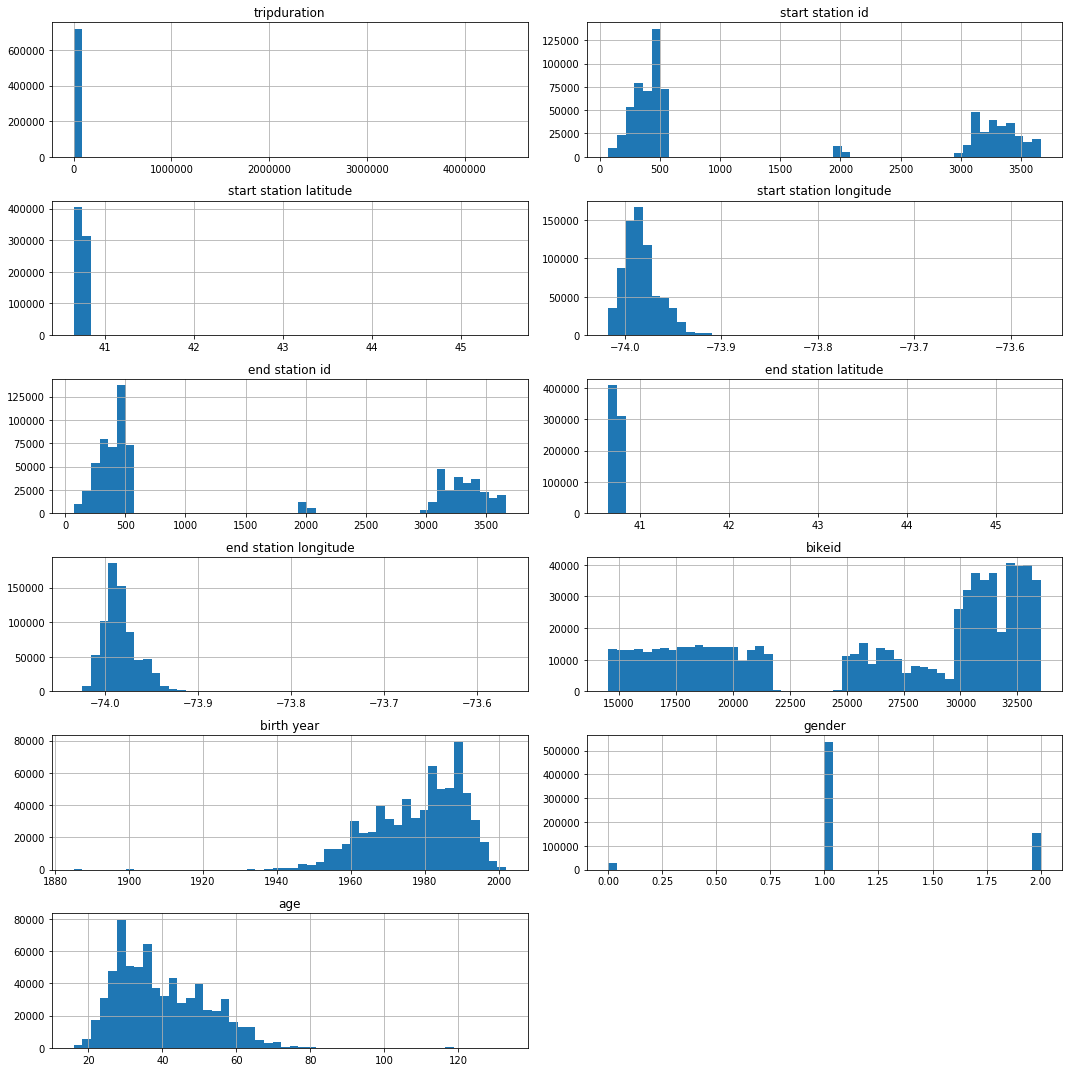

In [8]:
figure, axes = plt.subplots(nrows=6, ncols=1, figsize=(15,15))

i = 1
for col in data.columns:
    if data[col].dtype == np.float64 or data[col].dtype == np.int64:
        ax = plt.subplot(6, 2, i)
        data[col].hist(bins=50)
        ax.set_title(col)
        i += 1

figure.tight_layout()
plt.show()

To remove strange values

In [9]:
print("Initial rows= ",data.shape)
data = data[data['tripduration'] <= 24*60*60*10]
print("Final rows=   ",data.shape)

('Initial rows= ', (718990, 17))
('Final rows=   ', (718979, 17))


In [10]:
def toCheckUnique(startstation,endstation):
    a = len(data['start station id'].unique())
    b = len(data[['start station id', startstation]].drop_duplicates())
    c = len(data['end station id'].unique())
    d = len(data[['end station id', endstation]].drop_duplicates())

    return a == b and c == d
print("To check if one-to-one mapping exists")
print("For station name      :",toCheckUnique('start station name','end station name'))
print("For station Latitude  :",toCheckUnique('start station latitude','end station latitude'))
print("For station Longitude :",toCheckUnique('start station longitude','end station longitude'))

To check if one-to-one mapping exists
('For station name      :', True)
('For station Latitude  :', True)
('For station Longitude :', True)


In [11]:
gmap.plot(data['start station latitude'], data['start station longitude'], 'cornflowerblue', edge_width=10)
gmap.scatter(data['start station latitude'], data['start station longitude'], '#FF6666', edge_width=10)


NameError: name 'gmap' is not defined

In [ ]:
gmap.draw("my_map.html")

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

t1 = data[['start station id', 'start station name', 'start station latitude', 'start station longitude']] \
            .drop_duplicates().rename(columns = {'start station id':'station id', \
                                                 'start station name':'station name', \
                                                 'start station latitude':'station latitude', 
                                                 'start station longitude': 'station longitude'})
t2 = data[['end station id', 'end station name', 'end station latitude', 'end station longitude']] \
        .drop_duplicates().rename(columns = {'end station id':'station id', \
                                             'end station name':'station name', \
                                             'end station latitude':'station latitude', \
                                             'end station longitude': 'station longitude'})
df_loc = pd.concat([t1, t2]).drop_duplicates()

fig, ax = plt.subplots(figsize=(15,15))

# determine range to print based on min, max lat and lon of the data
lat = list(df_loc['station latitude'])
lon = list(df_loc['station longitude'])
text = list(df_loc['station id'])
margin = 0.01 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max - lon_min)/2,
            projection='lcc',
            resolution = 'f',)

m.drawcoastlines()
m.fillcontinents(lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawrivers()

# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)

# plot points as red dots
ax.scatter(lons, lats, marker = 'o', color='r', zorder=5, alpha=0.6)
for i in range(df_loc.shape[0]):
    plt.text(lons[i], lats[i], text[i])
plt.show()



ImportError: No module named basemap

In [13]:
data['starttime'] = pd.to_datetime(data['starttime'], format='%Y-%m-%d %H:%M:%S')
data['stoptime'] =pd.to_datetime(data['stoptime'], format='%Y-%m-%d %H:%M:%S')
data.info()


/usr/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 718979 entries, 0 to 718989
Data columns (total 17 columns):
tripduration               718979 non-null int64
starttime                  718979 non-null datetime64[ns]
stoptime                   718979 non-null datetime64[ns]
start station id           718979 non-null int64
start station name         718979 non-null object
start station latitude     718979 non-null float64
start station longitude    718979 non-null float64
end station id             718979 non-null int64
end station name           718979 non-null object
end station latitude       718979 non-null float64
end station longitude      718979 non-null float64
bikeid                     718979 non-null int64
name_localizedValue0       718979 non-null object
usertype                   718979 non-null object
birth year                 692840 non-null float64
gender                     718979 non-null int64
age                        692840 non-null float64
dtypes: datetime64[ns]

In [14]:
t1 = data[['start station id', 'start station name', 'start station latitude', 'start station longitude']] \
            .drop_duplicates().rename(columns = {'start station id':'station id', \
                                                 'start station name':'station name', \
                                                 'start station latitude':'station latitude', 
                                                 'start station longitude': 'station longitude'})
t2 = data[['end station id', 'end station name', 'end station latitude', 'end station longitude']] \
        .drop_duplicates().rename(columns = {'end station id':'station id', \
                                             'end station name':'station name', \
                                             'end station latitude':'station latitude', \
                                             'end station longitude': 'station longitude'})
df_loc = pd.concat([t1, t2]).drop_duplicates()
print(len(df_loc))

767


In [15]:
def gen_time_segment(dt):
    if dt.minute < 30:
        minute = "%02d" % 0
    else:
        minute = "%02d" % 30
    return "{}-{}-{} {}:{}".format(dt.year, dt.month, dt.day, dt.hour, minute)

data['start_seg'] = [gen_time_segment(dt) for dt in data['starttime']]
data['stop_seg'] = [gen_time_segment(dt) for dt in data['stoptime']]

data[['start station id', 'starttime', 'start_seg', 'end station id', 'stoptime', 'stop_seg']].head()

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,start station id,starttime,start_seg,end station id,stoptime,stop_seg
0,315,2018-01-01 00:01:51,2018-1-1 0:00,259,2018-01-01 00:05:07,2018-1-1 0:00
1,3224,2018-01-01 00:02:44,2018-1-1 0:00,470,2018-01-01 00:06:11,2018-1-1 0:00
2,386,2018-01-01 00:03:15,2018-1-1 0:00,2008,2018-01-01 00:13:28,2018-1-1 0:00
3,466,2018-01-01 00:06:44,2018-1-1 0:00,325,2018-01-01 00:12:59,2018-1-1 0:00
4,438,2018-01-01 00:06:57,2018-1-1 0:00,380,2018-01-01 00:13:40,2018-1-1 0:00


In [16]:
inflow = data[['end station id', 'stop_seg']] \
            .groupby(['end station id', 'stop_seg']) \
            .size().reset_index(name='counts') \
            .rename(columns={'end station id':'station id','stop_seg':'time', 'counts':'in_flow_count'})

In [17]:
outflow = data[['start station id', 'start_seg']] \
            .groupby(['start station id', 'start_seg']) \
            .size().reset_index(name='counts') \
            .rename(columns={'start station id':'station id','start_seg':'time', 'counts':'out_flow_count'})

In [18]:
import itertools

station_id_list = list(df_loc['station id'])

# Create combinations of time series and station ids
time_seg_list = list(pd.date_range("2018-01-01 00:00:00", "2018-01-31 23:30:00", freq="30min"))
template = pd.DataFrame(list(itertools.product(station_id_list, time_seg_list)), \
                        columns=["station id", "time"])

# Merge in/out flow information & Add zeros to missing data according to every time segment
dat = pd.merge(inflow, outflow, on=['station id', 'time'], how='outer')
dat['time'] = pd.to_datetime(dat['time'], format='%Y-%m-%d %H:%M')
dat = dat.merge(template, on=["station id", "time"], how="right").fillna(0)
dat.head()

,station id,time,in_flow_count,out_flow_count
0,72,2018-01-01 11:00:00,2.0,0.0
1,72,2018-01-01 12:00:00,1.0,0.0
2,72,2018-01-01 13:30:00,1.0,1.0
3,72,2018-01-01 16:00:00,1.0,0.0
4,72,2018-01-01 17:30:00,1.0,0.0


In [19]:
dat.head()

,station id,time,in_flow_count,out_flow_count
0,72,2018-01-01 11:00:00,2.0,0.0
1,72,2018-01-01 12:00:00,1.0,0.0
2,72,2018-01-01 13:30:00,1.0,1.0
3,72,2018-01-01 16:00:00,1.0,0.0
4,72,2018-01-01 17:30:00,1.0,0.0


we will be able to improve stock management of bikes using this data

Lets explore distance between each node (stations) of our graph 

In [20]:
print("no of nodes in this graph are {}".format(len(station_id_list)))

no of nodes in this graph are 767


we have used python library GeoPy to calculate distance between two places given their latitude and longitudes. this calculates geodesic distance between two points.

In [21]:
from geopy.distance import vincenty

lat_dic = {}
lon_dic = {}
for index, row in df_loc.iterrows():
    lat_dic[row['station id']] = row['station latitude']
    lon_dic[row['station id']] = row['station longitude']


c = itertools.combinations(station_id_list, 2)

distance = []
dist = 0
dist_sum = 0
count = 0
for stn1, stn2 in c:
        dist = vincenty((lat_dic[stn1], lon_dic[stn1]), (lat_dic[stn2], lon_dic[stn2])).meters
        distance.append([stn1,stn2,dist])
        dist_sum += dist
        count += 1
print("The avg distance between the nodes is :",(dist_sum/count))

('The avg distance between the nodes is :', 8766.54188839637)


In [22]:
df_weekdays = data[data['starttime'].dt.dayofweek < 5]
df_weekends = data[data['starttime'].dt.dayofweek >= 5]


weekdays = df_weekdays[['start station id', 'end station id']] \
                    .groupby(['start station id', 'end station id']) \
                    .size().reset_index(name='counts') \
                    .set_index(['start station id', 'end station id']) \
                    .sort_values(by='counts', ascending=False)
weekends = df_weekends[['start station id', 'end station id']] \
                    .groupby(['start station id', 'end station id']) \
                    .size().reset_index(name='counts') \
                    .set_index(['start station id', 'end station id']) \
                    .sort_values(by='counts', ascending=False)
            

weekdays = list(weekdays.head(1).index)
weekends = list(weekends.head(1).index)

print("The topmost frequent station pair in weekdays is: {} .",weekdays)
print("The topmost frequent stations pair in weekends is: {} .",weekends)

('The topmost frequent station pair in weekdays is: {} .', [(432, 3263)])
('The topmost frequent stations pair in weekends is: {} .', [(3158, 499)])


In [23]:
inflow = dat[['station id', 'in_flow_count']] \
                .groupby(['station id']) \
                .mean() \
                .sort_values(by='in_flow_count', ascending=False)
outflow = dat[['station id', 'out_flow_count']] \
                .groupby(['station id']) \
                .mean() \
                .sort_values(by='out_flow_count', ascending=False)
            
inflow = list(inflow.head(3).index)
outflow = list(outflow.head(3).index)

print("The top station in terms of outflow are: {}.  ",inflow)
print("The top  station in terms of inflow are: {}   ",outflow)

('The top station in terms of outflow are: {}.  ', [519, 435, 3255])
('The top  station in terms of inflow are: {}   ', [519, 435, 3255])


/usr/lib64/python2.7/site-packages/pandas/plotting/_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


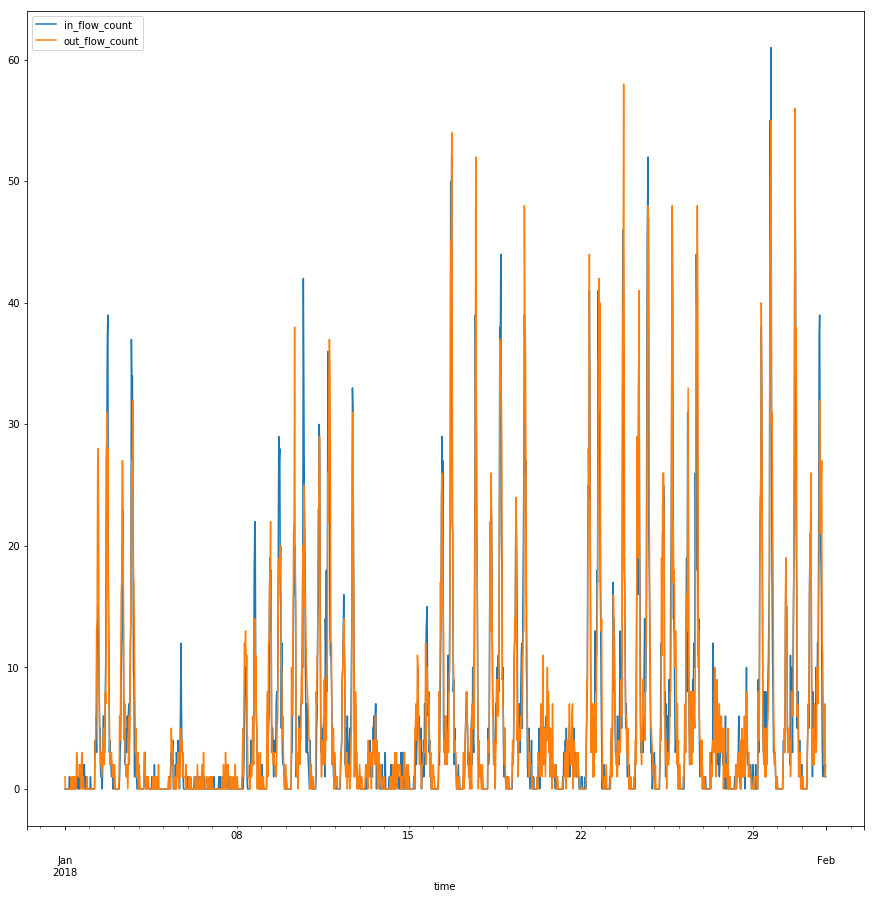

In [24]:
small_df = dat[dat['station id'] == 519].sort_values(by='time')
small_df = small_df.sort_values(by='time')

small_df.plot(x='time', y=['in_flow_count', 'out_flow_count'], kind='line', figsize=(15,15))
plt.show()

In [25]:
from sklearn import metrics
dist = metrics.pairwise_distances([small_df['in_flow_count']], [small_df['out_flow_count']], metric='euclidean')
print("The euclidean distance between in-flow and out-flow of this station is: {}".format(dist[0][0]))

The euclidean distance between in-flow and out-flow of this station is: 145.801234563


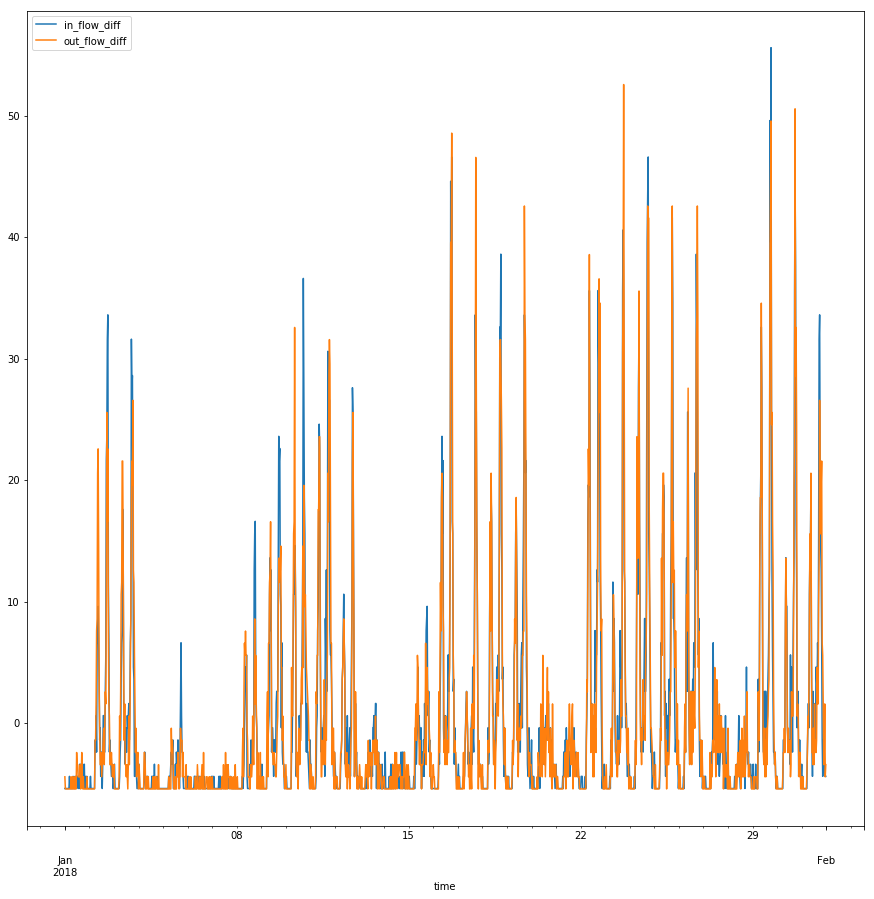

In [26]:
small_df['in_flow_diff'] = small_df['in_flow_count'] - small_df['in_flow_count'].mean()
small_df['out_flow_diff'] = small_df['out_flow_count'] - small_df['out_flow_count'].mean()

# Plot line chart
small_df.plot(x='time', y=['in_flow_diff', 'out_flow_diff'], kind='line', figsize=(15,15))
plt.show()

In [27]:
small_df.head()

,station id,time,in_flow_count,out_flow_count,in_flow_diff,out_flow_diff
373229,519,2018-01-01 00:00:00,0.0,1.0,-5.393817,-4.430108
479642,519,2018-01-01 00:30:00,0.0,0.0,-5.393817,-5.430108
479643,519,2018-01-01 01:00:00,0.0,0.0,-5.393817,-5.430108
479644,519,2018-01-01 01:30:00,0.0,0.0,-5.393817,-5.430108
479645,519,2018-01-01 02:00:00,0.0,0.0,-5.393817,-5.430108


In [28]:
data = data_backup

In [29]:
data = data[data['tripduration'] <= 24*60*60*10]

In [30]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,name_localizedValue0,usertype,birth year,gender,age
0,196,2018-01-01 00:01:51,2018-01-01 00:05:07,315,South St & Gouverneur Ln,40.703554,-74.006702,259,South St & Whitehall St,40.701221,-74.012342,18534,Annual Membership,Subscriber,1997.0,1,21.0
1,207,2018-01-01 00:02:44,2018-01-01 00:06:11,3224,W 13 St & Hudson St,40.739974,-74.005139,470,W 20 St & 8 Ave,40.743453,-74.000040,19651,Annual Membership,Subscriber,1978.0,1,40.0
2,613,2018-01-01 00:03:15,2018-01-01 00:13:28,386,Centre St & Worth St,40.714948,-74.002345,2008,Little West St & 1 Pl,40.705693,-74.016777,21678,Annual Membership,Subscriber,1982.0,1,36.0
3,375,2018-01-01 00:06:44,2018-01-01 00:12:59,466,W 25 St & 6 Ave,40.743954,-73.991449,325,E 19 St & 3 Ave,40.736245,-73.984738,29822,Annual Membership,Subscriber,1982.0,1,36.0
4,402,2018-01-01 00:06:57,2018-01-01 00:13:40,438,St Marks Pl & 1 Ave,40.727791,-73.985649,380,W 4 St & 7 Ave S,40.734011,-74.002939,30722,Annual Membership,Subscriber,1989.0,1,29.0


In [31]:
data = data.dropna(axis=0, how='any')

In [32]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [33]:
regr.fit(data['tripduration'].as_matrix().reshape(-1, 1), data['age'].as_matrix())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
y_pred_linear = regr.predict(data['tripduration'].as_matrix().reshape(-1, 1))

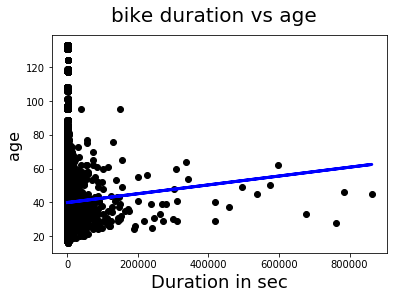

In [35]:
plt.scatter(data['tripduration'].as_matrix(), data['age'].as_matrix(),  color='black')
plt.plot(data['tripduration'].as_matrix(), y_pred_linear, color='blue', linewidth=3)

plt.suptitle('bike duration vs age', fontsize=20)
plt.xlabel('Duration in sec', fontsize=18)
plt.ylabel('age', fontsize=16)

plt.show()

In [36]:
data[(data['start station id'] == 432) & (data['end station id'] == 3263)]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,name_localizedValue0,usertype,birth year,gender,age
4177,292,2018-01-01 18:07:05,2018-01-01 18:11:58,432,E 7 St & Avenue A,40.726218,-73.983799,3263,Cooper Square & Astor Pl,40.729515,-73.990753,14695,Annual Membership,Subscriber,1970.0,1,48.0
6208,230,2018-01-02 06:45:18,2018-01-02 06:49:09,432,E 7 St & Avenue A,40.726218,-73.983799,3263,Cooper Square & Astor Pl,40.729515,-73.990753,19389,Annual Membership,Subscriber,1991.0,1,27.0
6354,241,2018-01-02 06:57:30,2018-01-02 07:01:31,432,E 7 St & Avenue A,40.726218,-73.983799,3263,Cooper Square & Astor Pl,40.729515,-73.990753,32955,Annual Membership - Save 15%,Subscriber,1986.0,2,32.0
7063,272,2018-01-02 07:40:16,2018-01-02 07:44:48,432,E 7 St & Avenue A,40.726218,-73.983799,3263,Cooper Square & Astor Pl,40.729515,-73.990753,14993,Annual Membership,Subscriber,1982.0,2,36.0
7074,237,2018-01-02 07:41:00,2018-01-02 07:44:58,432,E 7 St & Avenue A,40.726218,-73.983799,3263,Cooper Square & Astor Pl,40.729515,-73.990753,26066,Annual Membership,Subscriber,1967.0,1,51.0
7205,183,2018-01-02 07:47:44,2018-01-02 07:50:47,432,E 7 St & Avenue A,40.726218,-73.983799,3263,Cooper Square & Astor Pl,40.729515,-73.990753,33130,Annual Membership,Subscriber,1991.0,1,27.0
9788,279,2018-01-02 09:12:02,2018-01-02 09:16:41,432,E 7 St & Avenue A,40.726218,-73.983799,3263,Cooper Square & Astor Pl,40.729515,-73.990753,30314,NYCHA Membership (Renewal),Subscriber,1982.0,1,36.0
12608,243,2018-01-02 12:36:19,2018-01-02 12:40:22,432,E 7 St & Avenue A,40.726218,-73.983799,3263,Cooper Square & Astor Pl,40.729515,-73.990753,30108,Annual Membership,Subscriber,1994.0,1,24.0
20377,268,2018-01-02 18:26:31,2018-01-02 18:30:59,432,E 7 St & Avenue A,40.726218,-73.983799,3263,Cooper Square & Astor Pl,40.729515,-73.990753,32545,Annual Membership,Subscriber,1994.0,2,24.0
21043,256,2018-01-02 18:46:53,2018-01-02 18:51:10,432,E 7 St & Avenue A,40.726218,-73.983799,3263,Cooper Square & Astor Pl,40.729515,-73.990753,15907,Annual Membership,Subscriber,1986.0,1,32.0


In [37]:
data['Date'] = pd.to_datetime(data['starttime'], format='%Y-%m-%d %H:%M:%S').dt.date

In [38]:
d1 = data[(data['start station id'] == 432) & (data['end station id'] == 3263)]

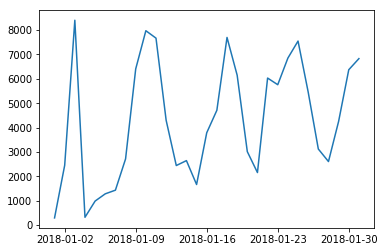

In [39]:
plt.plot(d1.groupby(['Date'])['tripduration'].sum())

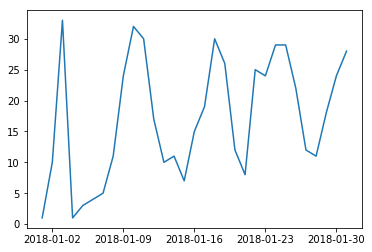

In [40]:
plt.plot(d1.groupby(['Date'])['tripduration'].count())

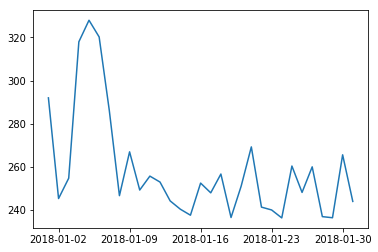

In [41]:
plt.plot(d1.groupby(['Date'])['tripduration'].mean())

In [42]:
e = []
index = 0
w = []
for index, row in data.iterrows():
    try:
        index=e.index([row['start station id'],row['end station id']])
        w[index] += 1        
    except ValueError:
        e.append([row['start station id'],row['end station id']])
        w.append(1)

In [43]:
e[8][0]

336

In [44]:
from networkx import edge_betweenness_centrality as betweenness

In [45]:
def most_central_edge(G):
    centrality = betweenness(G, weight='weight')
    return max(centrality, key=centrality.get)

In [46]:
import networkx as nx

In [47]:
G=nx.Graph()

In [48]:
for i in range(len(w)):
    G.add_edge(e[i][0],e[i][1],weight=0.6)


In [78]:
G

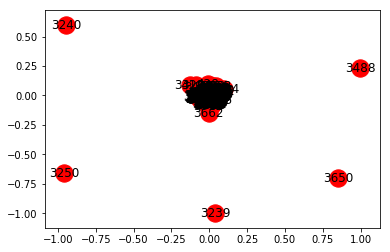

In [79]:
nx.draw_networkx(G)

In [51]:
def edges_to_remove(G):
    dict1 = nx.edge_betweenness_centrality(G)
    list_of_touples = dict1.items()
    list_of_touples.sort(key = lambda x:x[1], reverse = True)
    return list_of_touples[0][0]

def girvan(G):
    c = nx.connected_component_subgraphs(G)
    l = len(c)
    print "number of connected components are: ",l
    while(l==1):
        G.remove_edge(*edges_to_remove(G))
        c = nx.connected_component_subgraphs(G)
        l = len(c)
        print "number of connected components are: ",l
    return c

In [52]:
dict1 = nx.edge_betweenness_centrality(G)

In [58]:
dictlist = []
for key, value in dict1.iteritems():
    temp = [key,value]
    dictlist.append(temp)

In [63]:
dictlist

[[(266, 351), 1.2069003025418297e-05],
 [(303, 3660), 1.2346669044421569e-05],
 [(3338, 2023), 4.814673856397074e-05],
 [(247, 483), 1.048010825105077e-05],
 [(305, 3160), 1.854110445203175e-05],
 [(516, 3074), 5.8910887245053425e-05],
 [(228, 412), 5.188055215428393e-05],
 [(3367, 3521), 8.41538774768115e-06],
 [(486, 2012), 1.1263120944257388e-05],
 [(264, 3435), 1.2036558759912262e-05],
 [(323, 3303), 2.271405450901654e-05],
 [(327, 472), 1.1037402098546018e-05],
 [(3162, 3305), 1.2282161223621852e-05],
 [(403, 504), 1.2528406157596577e-05],
 [(368, 3067), 5.9221830689165696e-05],
 [(3137, 3305), 1.0740518497538572e-05],
 [(3140, 3164), 1.020237354684079e-05],
 [(167, 448), 1.0613013244069488e-05],
 [(319, 517), 2.2754222574561215e-05],
 [(364, 3402), 1.6237002949409834e-05],
 [(379, 3459), 1.2694253536854376e-05],
 [(491, 516), 1.4600058150490417e-05],
 [(3324, 3371), 1.3343433722119276e-05],
 [(314, 3354), 2.4189282616299573e-05],
 [(388, 2021), 1.2317816820999657e-05],
 [(3336, 3

In [64]:
nG=nx.Graph()

In [65]:
for i in range(len(dictlist)):
    nG.add_edge(dictlist[i][0][0],dictlist[i][0][1],weight=dictlist[i][1])

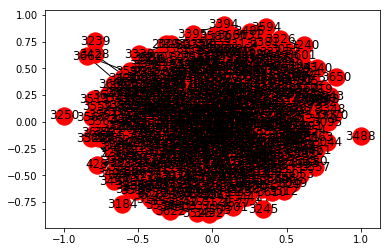

In [66]:
nx.draw_networkx(nG)

In [70]:
max = max(dict1.values())

In [72]:
for key, value in dict1.iteritems():    # for name, age in list.items():  (for Python 3.x)
    if value == max:
        print key

(359, 3240)


In [74]:
G.remove_edge(359, 3240)
c = nx.connected_component_subgraphs(G)

In [75]:
c

<generator object connected_component_subgraphs at 0x3e3f6640>

In [77]:
for i in c:
    print i.nodes()

[3239]
[3240]
[3250]
[3488]
[3650]


In [90]:
# data[(data['start station id'] == 3239)] -- Bressler 40.646538	-74.016588	
#data[(data['start station id'] == 3250)] -- NYCBS Depot - PIT  40.71691	-73.983838
#data[(data['start station id'] == 3488)] -- 8D QC Station 01	45.506364	-73.569463
#data[(data['start station id'] == 3650)] --8D Mobile 01	45.506264	-73.568906

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,name_localizedValue0,usertype,birth year,gender,age,Date
249015,66,2018-01-16 11:13:55,2018-01-16 11:15:02,3650,8D Mobile 01,45.506264,-73.568906,3650,8D Mobile 01,45.506264,-73.568906,21928,$25 Off Annual Membership,Subscriber,1986.0,1,32.0,2018-01-16
249058,1024,2018-01-16 11:16:15,2018-01-16 11:33:20,3650,8D Mobile 01,45.506264,-73.568906,3650,8D Mobile 01,45.506264,-73.568906,21928,$25 Off Annual Membership,Subscriber,1986.0,1,32.0,2018-01-16
249572,170,2018-01-16 11:46:42,2018-01-16 11:49:33,3650,8D Mobile 01,45.506264,-73.568906,3650,8D Mobile 01,45.506264,-73.568906,21928,$25 Off Annual Membership,Subscriber,1986.0,1,32.0,2018-01-16
249680,311,2018-01-16 11:52:48,2018-01-16 11:57:59,3650,8D Mobile 01,45.506264,-73.568906,3650,8D Mobile 01,45.506264,-73.568906,21928,$25 Off Annual Membership,Subscriber,1986.0,1,32.0,2018-01-16
414102,659,2018-01-22 10:16:46,2018-01-22 10:27:45,3650,8D Mobile 01,45.506264,-73.568906,3650,8D Mobile 01,45.506264,-73.568906,24354,$25 Off Annual Membership,Subscriber,1986.0,1,32.0,2018-01-22
414396,1587,2018-01-22 10:29:43,2018-01-22 10:56:11,3650,8D Mobile 01,45.506264,-73.568906,3650,8D Mobile 01,45.506264,-73.568906,24354,$25 Off Annual Membership,Subscriber,1986.0,1,32.0,2018-01-22
416083,3540,2018-01-22 11:50:18,2018-01-22 12:49:19,3650,8D Mobile 01,45.506264,-73.568906,3650,8D Mobile 01,45.506264,-73.568906,24354,$25 Off Annual Membership,Subscriber,1986.0,1,32.0,2018-01-22
418100,1843,2018-01-22 13:06:08,2018-01-22 13:36:52,3650,8D Mobile 01,45.506264,-73.568906,3650,8D Mobile 01,45.506264,-73.568906,24354,$25 Off Annual Membership,Subscriber,1986.0,1,32.0,2018-01-22
418364,128,2018-01-22 13:17:15,2018-01-22 13:19:24,3650,8D Mobile 01,45.506264,-73.568906,3650,8D Mobile 01,45.506264,-73.568906,21928,Annual Membership from Citi Bike App,Subscriber,1987.0,1,31.0,2018-01-22
418470,3351,2018-01-22 13:21:02,2018-01-22 14:16:54,3650,8D Mobile 01,45.506264,-73.568906,3650,8D Mobile 01,45.506264,-73.568906,21928,Annual Membership from Citi Bike App,Subscriber,1987.0,1,31.0,2018-01-22
